In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv('fashionnova_reviews.csv')

zaman serisi analizi ile müşteri memnuniyeti

In [7]:
# Rating sütunundaki verileri temizleme ve sayısal formata dönüştürme
def extract_star_count(rating):
    try:
        # "Rated 5 out of 5 stars" formatındaki değerlerden sayıları çıkarır
        return int(rating.split(' ')[1])
    except Exception as e:
        # Hata durumunda NaN döndürür
        print(f"Error parsing rating: {rating} - {e}")
        return np.nan

In [8]:
# Rating sütununu temizle ve dönüştür
df['Star Count'] = df['Rating'].apply(extract_star_count)

In [9]:
# NaN değerleri içeren satırları kaldır
df.dropna(subset=['Star Count'], inplace=True)

In [10]:
# Tarih sütununu datetime formatına dönüştürme
df['Review Date'] = pd.to_datetime(df['Review Date'])

C:\Users\Simay\AppData\Local\Temp\ipykernel_43676\331754325.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Review Date'] = pd.to_datetime(df['Review Date'])


In [11]:
# Tarihe göre gruplama ve aylık ortalama hesaplama
df.set_index('Review Date', inplace=True)
monthly_avg_rating = df['Star Count'].resample('M').mean()

C:\Users\Simay\AppData\Local\Temp\ipykernel_43676\2519866551.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_rating = df['Star Count'].resample('M').mean()


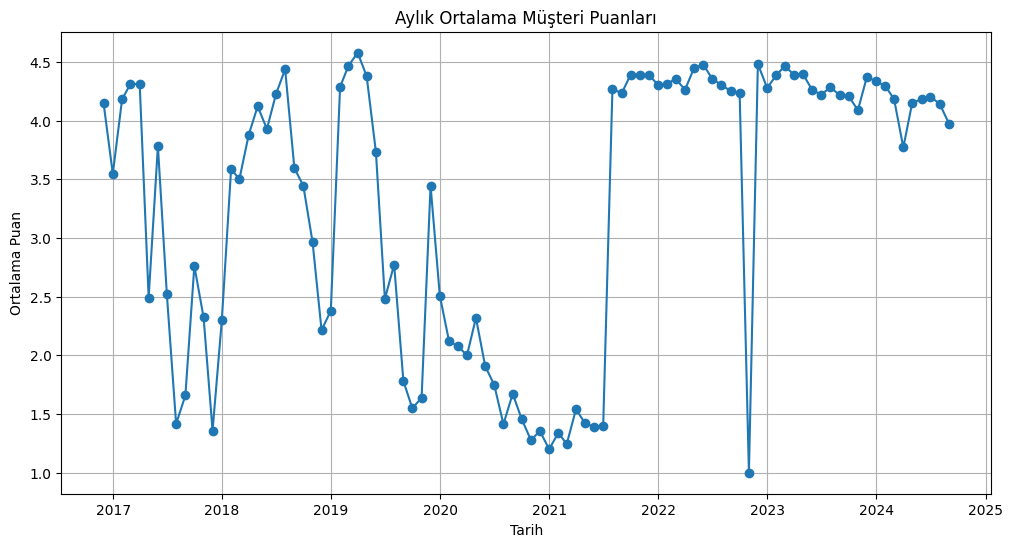

In [12]:
# Görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_rating.index, monthly_avg_rating.values, marker='o')
plt.title('Aylık Ortalama Müşteri Puanları')
plt.xlabel('Tarih')
plt.ylabel('Ortalama Puan')
plt.grid(True)
plt.show()